Time Series Decomposition

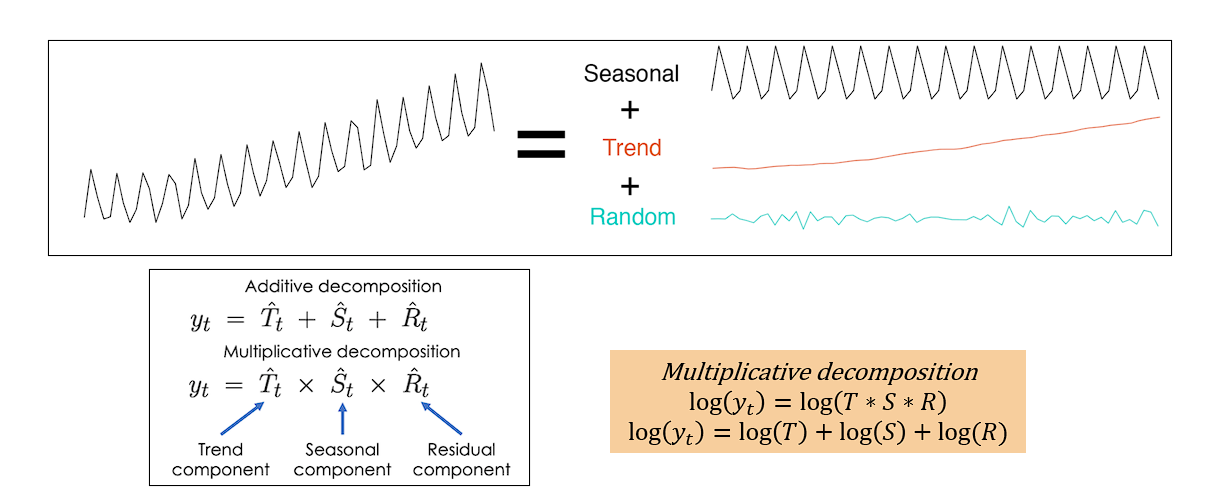

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv', index_col='Month',parse_dates=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
df.isna().sum()

#Passengers    0
dtype: int64

In [5]:
df.columns =['npass']

In [6]:
df.head()

,npass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visulize the time series data

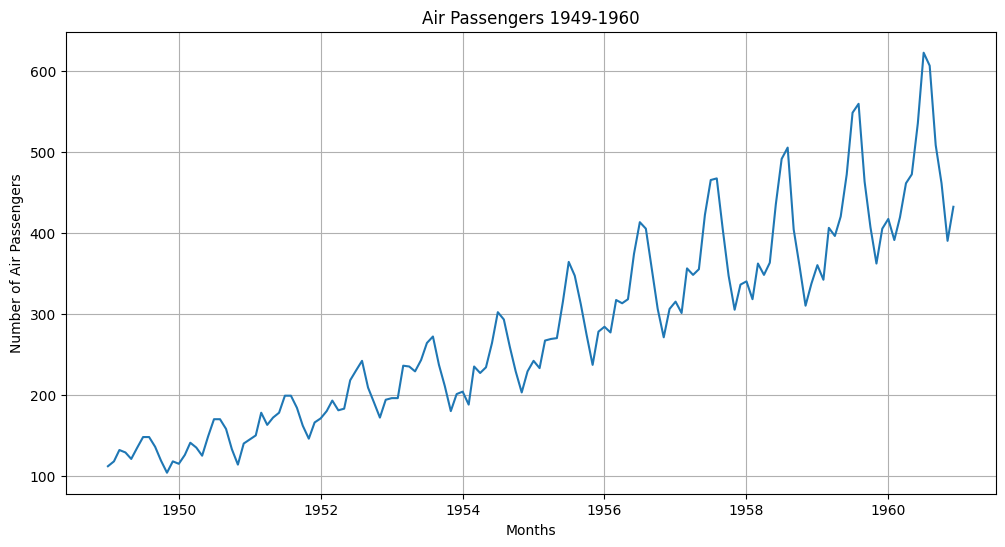

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(df['npass'])
plt.xlabel('Months')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passengers 1949-1960')
plt.grid()
plt.show()

Time Series decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
Q = seasonal_decompose(df['npass'], model='multiplicative')

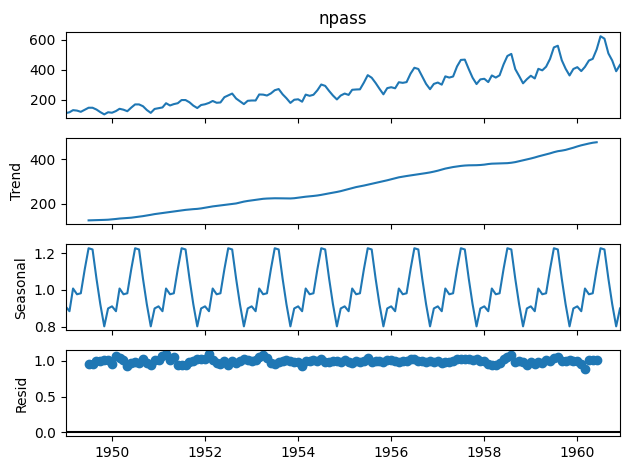

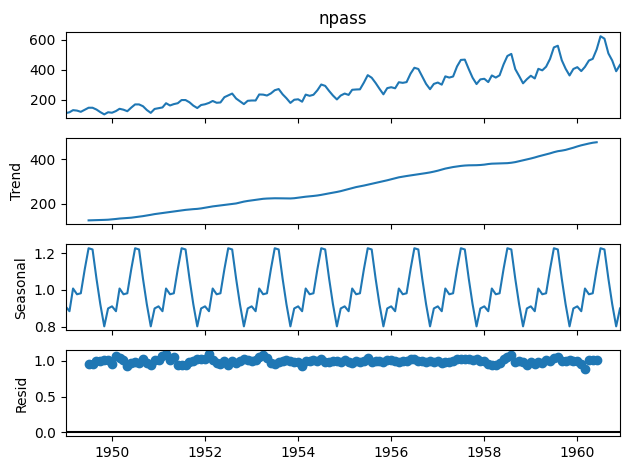

In [10]:
Q.plot()

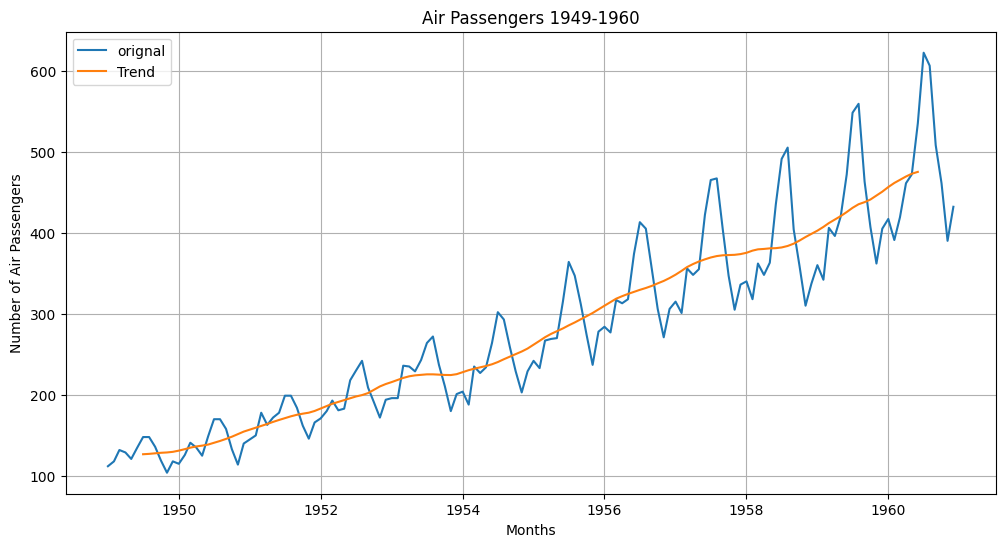

In [11]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(df['npass'], label='orignal')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passengers 1949-1960')
plt.grid()
plt.legend()
plt.show()

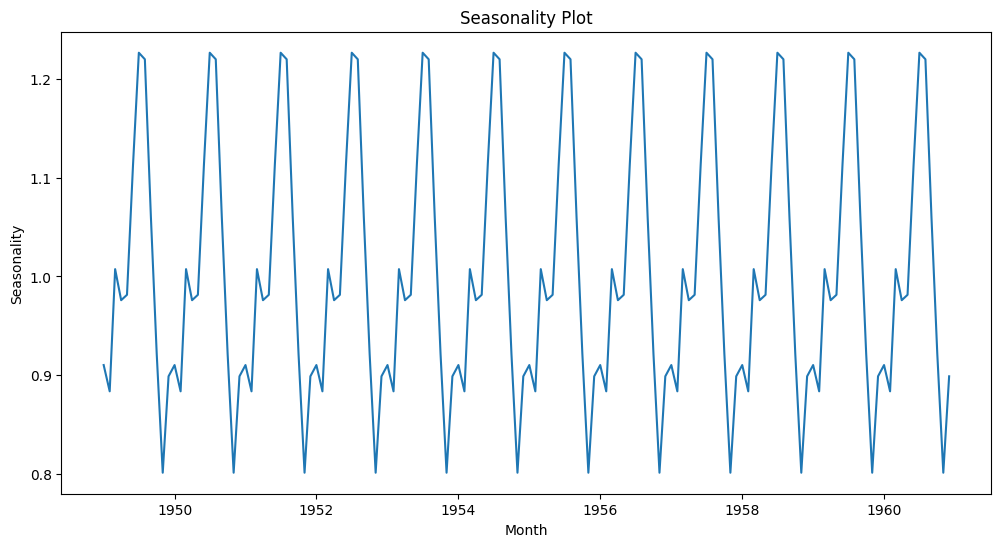

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(Q.seasonal)
plt.xlabel('Month')
plt.ylabel('Seasonality')
plt.title('Seasonality Plot')
plt.show()

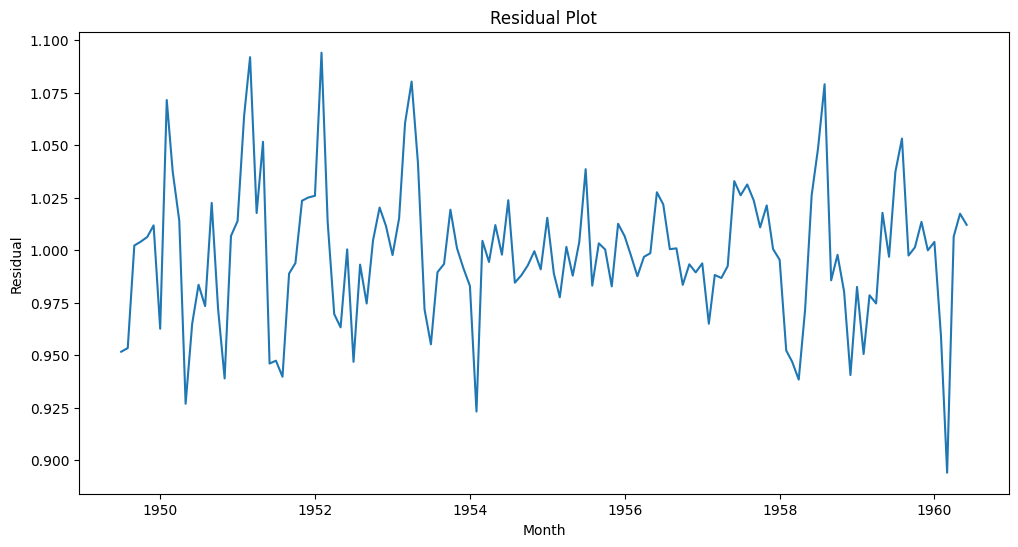

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

Time Series Forecasting

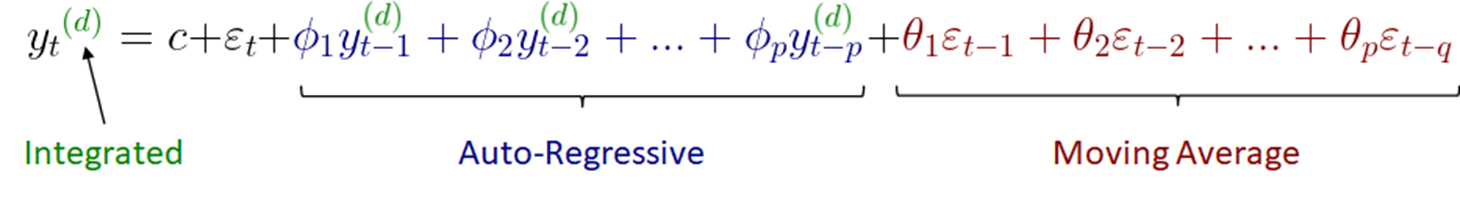

Install the pmdarima model

In [14]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from pmdarima.arima import auto_arima

In [21]:
model = auto_arima(df['npass'], seasonal=True, m=12)

In [22]:
model.order

(2, 1, 1)

In [25]:
p = model.order[0]
d= model.order[1]
q=model.order[2]

In [26]:
p

2

In [27]:
d

1

In [28]:
q

1

Get the forecasted value for next 3 years

In [29]:
forecast,conf =model.predict(n_periods=36,return_conf_int=True)

In [30]:
forecast

1961-01-01    445.634934
1961-02-01    420.395042
1961-03-01    449.198378
1961-04-01    491.840023
1961-05-01    503.394565
1961-06-01    566.862550
1961-07-01    654.260284
1961-08-01    638.597604
1961-09-01    540.883864
1961-10-01    494.126748
1961-11-01    423.332841
1961-12-01    465.507712
1962-01-01    479.291026
1962-02-01    454.177037
1962-03-01    483.087203
1962-04-01    525.819493
1962-05-01    537.450950
1962-06-01    600.984197
1962-07-01    688.437307
1962-08-01    672.821614
1962-09-01    575.147743
1962-10-01    528.424456
1962-11-01    457.659254
1962-12-01    499.858481
1963-01-01    513.662462
1963-02-01    488.566008
1963-03-01    517.491053
1963-04-01    560.235969
1963-05-01    571.878138
1963-06-01    635.420475
1963-07-01    722.881298
1963-08-01    707.272149
1963-09-01    609.603831
1963-10-01    562.885256
1963-11-01    492.124052
1963-12-01    534.326671
Freq: MS, dtype: float64

In [31]:
conf

array([[423.34475094, 467.92511658],
       [394.23518302, 446.55490116],
       [419.83140846, 478.56534829],
       [460.37587373, 523.30417201],
       [470.37999658, 536.40913406],
       [532.69880168, 601.02629843],
       [619.22055901, 689.30000963],
       [602.87921604, 674.31599104],
       [504.63055231, 577.13717502],
       [457.44514984, 530.80834643],
       [386.3030106 , 460.36267117],
       [428.19044593, 502.82497842],
       [433.49653884, 525.08551376],
       [405.10774907, 503.24632483],
       [431.15437638, 535.02002912],
       [471.83916844, 579.79981805],
       [481.87209035, 593.02980929],
       [544.15500525, 657.81338881],
       [630.60709073, 746.26752372],
       [614.17741433, 731.46581272],
       [515.83056926, 634.46491613],
       [468.54219966, 588.30671331],
       [397.2952923 , 518.02321528],
       [439.07790127, 560.63906114],
       [446.32509131, 580.99983223],
       [418.31603539, 558.81598086],
       [444.62194643, 590.36015987],
 

Add above result in dataframe

In [32]:
df_forecast = forecast.to_frame()
df_forecast.columns=['forecast']
df_forecast

,forecast
1961-01-01,445.634934
1961-02-01,420.395042
1961-03-01,449.198378
1961-04-01,491.840023
1961-05-01,503.394565
1961-06-01,566.862550
1961-07-01,654.260284
1961-08-01,638.597604
1961-09-01,540.883864
1961-10-01,494.126748


In [33]:
df_forecast[['Low_counf','Upper_conf']]=conf

In [34]:
df_forecast

,forecast,Low_counf,Upper_conf
1961-01-01,445.634934,423.344751,467.925117
1961-02-01,420.395042,394.235183,446.554901
1961-03-01,449.198378,419.831408,478.565348
1961-04-01,491.840023,460.375874,523.304172
1961-05-01,503.394565,470.379997,536.409134
1961-06-01,566.862550,532.698802,601.026298
1961-07-01,654.260284,619.220559,689.300010
1961-08-01,638.597604,602.879216,674.315991
1961-09-01,540.883864,504.630552,577.137175
1961-10-01,494.126748,457.445150,530.808346


In [35]:
df_forecast['forecast'] = df_forecast['forecast'].apply(round)

In [36]:
df_forecast.head()

,forecast,Low_counf,Upper_conf
1961-01-01,446,423.344751,467.925117
1961-02-01,420,394.235183,446.554901
1961-03-01,449,419.831408,478.565348
1961-04-01,492,460.375874,523.304172
1961-05-01,503,470.379997,536.409134


In [38]:
for  i in df_forecast.columns:
    df_forecast[i]=df_forecast[i].apply(round)

In [39]:
df_forecast

,forecast,Low_counf,Upper_conf
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


Save above dataframe to csv

In [40]:
df_forecast.to_csv('AirPassengerForecast.csv')

Visualizing above result 

ValueError: too many values to unpack (expected 2)

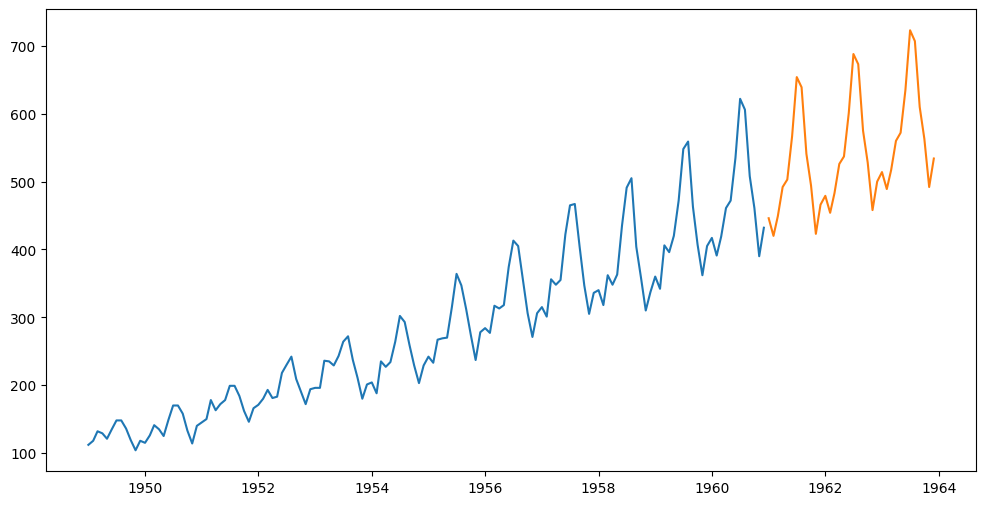

In [46]:
plt.figure(figsize=(12,6))
plt.plot(df['npass'], label='Observed')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.fill_between(df_forecast.index, df_forecast['Low_conf'], df_forecast)['Upper_conf'], color='gray' 
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title('Forecasted Values')
plt.legend()
plt.show()